## TP: Bagging and Random Forests

In [1]:
from scipy.stats import binom
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt


### Question de mathématiques :

On a L classifiers qui sont indépendants et suivent une loi de bernouilli $ Ber(p)$ où $p>0.5$  donc la combinaison de ces $L$ classifiers suit une loi binomiale $Bin(p,L)$ comme étant la somme de loi de bernouilli $Ber(p)$

### Question 1 :

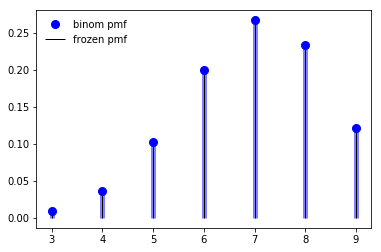

In [2]:
L = 10
p = 0.7

fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, L, p),binom.ppf(0.99, L, p))
ax.plot(x, binom.pmf(x, L, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', lw=5, alpha=0.5)
rv = binom(L, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
          label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

## Bagging :

### Question 1: 

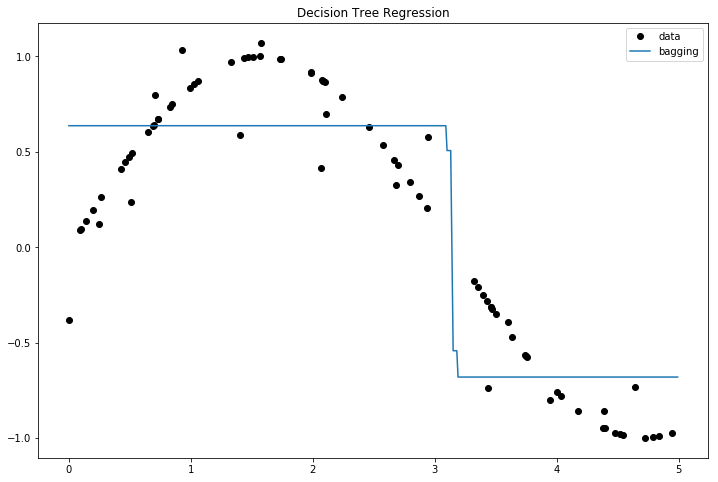

In [3]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10  # L in the text
tree_max_depth = 10

# define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)

bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators,
                           random_state=rng)

bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")

# TODO add plots for Bagging/Tree
plt.plot(X_test, y_bagging, label="bagging")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

### Question 2

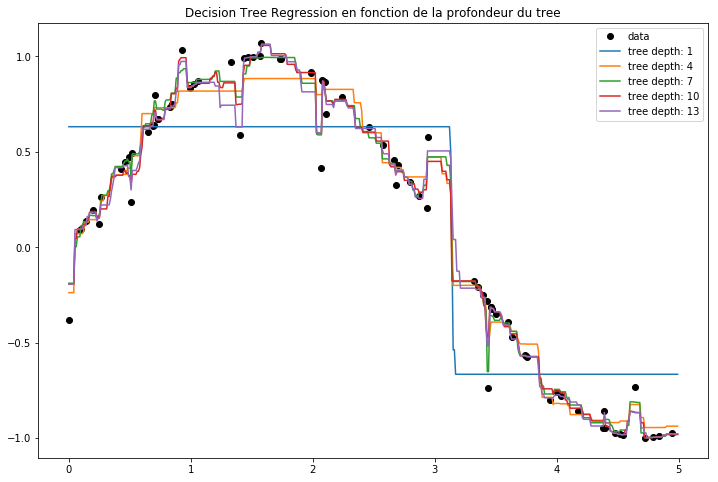

In [4]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# Tree Depth
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
for depth in range(1,15,3):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X, y)

    bagging = BaggingRegressor(base_estimator=tree,
                           n_estimators=n_estimators,
                           random_state=rng)

    bagging.fit(X, y)
    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test) ## X_test ou X seulement ?????
    # Plot the results
    plt.plot(X_test,y_bagging, label='tree depth: %d'%depth)
    # TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression en fonction de la profondeur du tree")
plt.legend(loc=1, numpoints=1)
plt.show()



**Interpretation :** Nous constatons à partir de ce graphe qu'en augmentant la profondeur de l'arbre , nous obtenons un model plus adapté aux jeux de données mais plus complèxe.

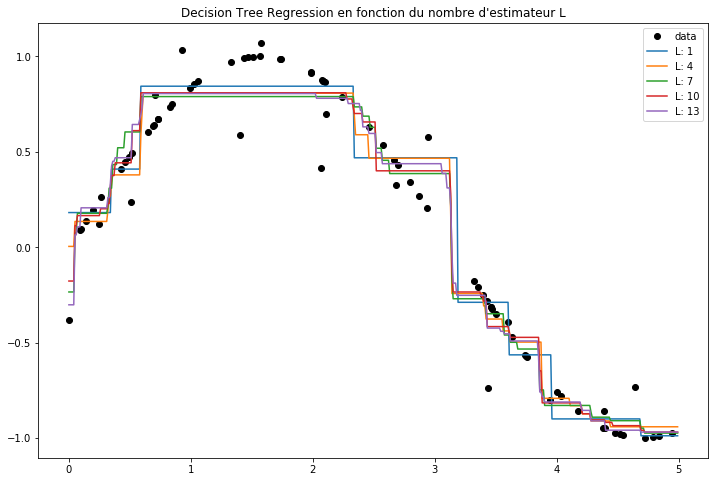

In [5]:
# roles du nombre d'estimateur L
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
for L in range(1, 15, 3):
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X, y)

    bagging = BaggingRegressor(base_estimator=tree,
                               n_estimators=L,
                               random_state=rng)

    bagging.fit(X, y)
    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test) 
    # Plot the results
    plt.plot(X_test, y_bagging, label='L: %d' % L)
    # TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression en fonction du nombre d'estimateur L")
plt.legend(loc=1, numpoints=1)
plt.show()

**Interpretation :** Nous constatons à partir de ce graphe qu'en augmentant cette fois le nombre de classifier, nous obtenons un model plus adapté aux jeux de données.

### Question 3

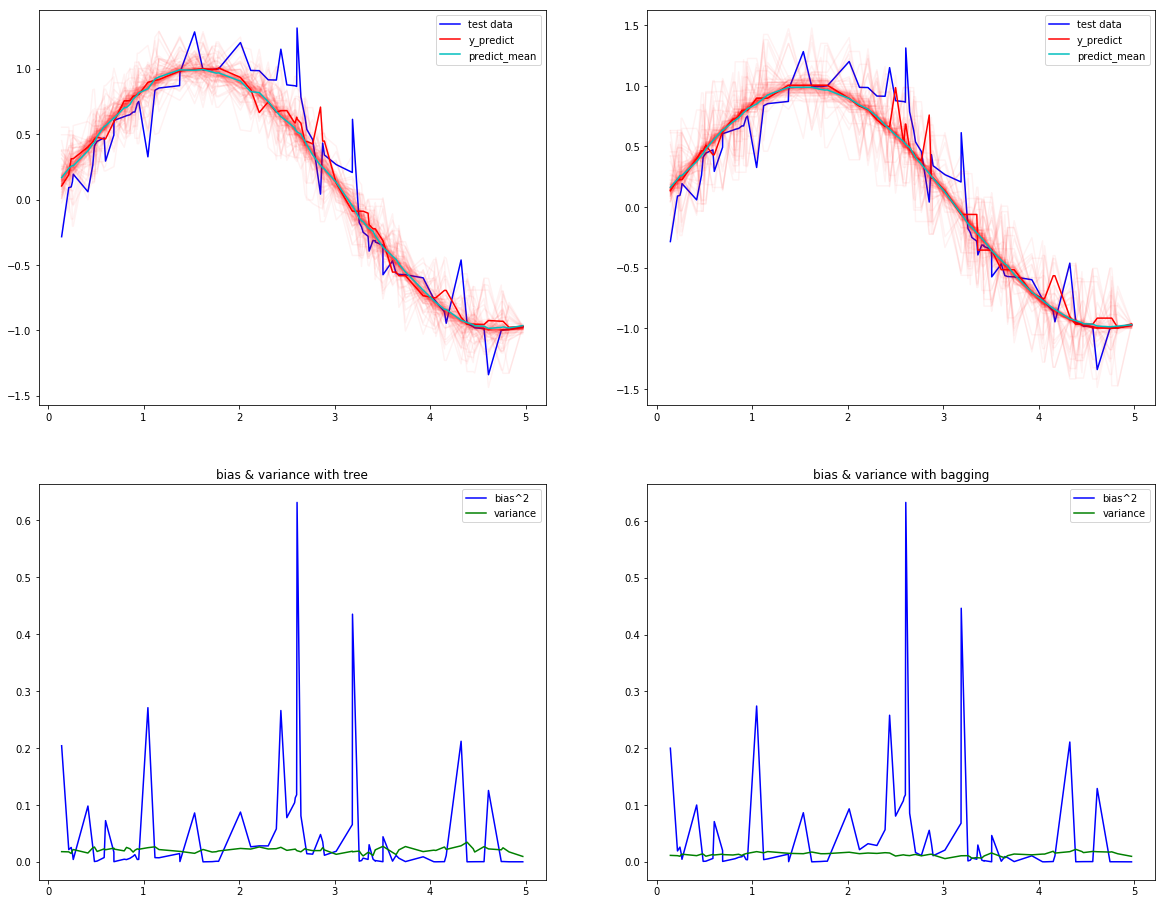

In [6]:
n = 100
L = 10
# Generate test data
rng = np.random.RandomState(n+1)
X_test = np.sort(5 * rng.rand(80, 1), axis=0)  # length:80
y_test = np.sin(X).ravel()
y_test[::5] += 1 * (0.5 - rng.rand(16))

y_bagging = np.zeros((80, n))
y_tree = np.zeros((80, n))

plt.figure(figsize=(20, 16))
plt.subplot(2, 2, 1)
plt.plot(X_test, y_test, "b", label="test data")
plt.subplot(2, 2, 2)
plt.plot(X_test, y_test, "b", label="test data")

# Generate n time the trainig dat to calculate the empirical estimator
for i in range(1, n):
    rng = np.random.RandomState(i+1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - rng.rand(16))
    n_estimators = 10  # L in the text
    tree_max_depth = 10
    tree = DecisionTreeRegressor(max_depth=8)
    tree.fit(X, y)

    bagging = BaggingRegressor(base_estimator=tree,
                               n_estimators=L,
                               random_state=rng)

    bagging.fit(X, y)
    y_tree_i = tree.predict(X_test)
    y_bagging_i = bagging.predict(X_test)
    y_bagging[:, i] = y_bagging_i
    y_tree[:, i] = y_tree_i

    plt.subplot(2, 2, 1)
    if i == 1:
        plt.plot(X_test, y_bagging_i, "r", label="y_predict")
    else:
        plt.plot(X_test, y_bagging_i, "r", alpha=0.05)
    
    plt.subplot(2, 2, 2)
    if i == 1:
        plt.plot(X_test, y_tree_i, "r", label="y_predict")
    else:
        plt.plot(X_test, y_tree_i, "r", alpha=0.05)

plt.subplot(2, 2, 2)        
plt.plot(X_test, np.mean(y_bagging, axis=1), "c", label="predict_mean")
plt.legend()
plt.subplot(2, 2, 1)
plt.plot(X_test, np.mean(y_tree, axis=1), "c", label="predict_mean")
plt.legend()

y_biais_bagging = (y_test - np.mean(y_bagging, axis=1)) ** 2
y_var_bagging = np.var(y_bagging, axis=1)
plt.subplot(2, 2, 4)
plt.plot(X_test, y_biais_bagging, "b", label="bias^2")
plt.plot(X_test, y_var_bagging, "g", label="variance")
plt.legend()
plt.title('bias & variance with bagging')

y_biais_tree = (y_test - np.mean(y_tree, axis=1)) ** 2
y_var_tree = np.var(y_tree, axis=1)
plt.subplot(2, 2, 3)
plt.plot(X_test, y_biais_tree, "b", label="bias^2")
plt.plot(X_test, y_var_tree, "g", label="variance")
plt.legend()
plt.title('bias & variance with tree')
plt.show()

**Interprétation:** nous pouvons voir ici que la variance de prédiction est moins importante avec le modèle Bagging.

## Question 4

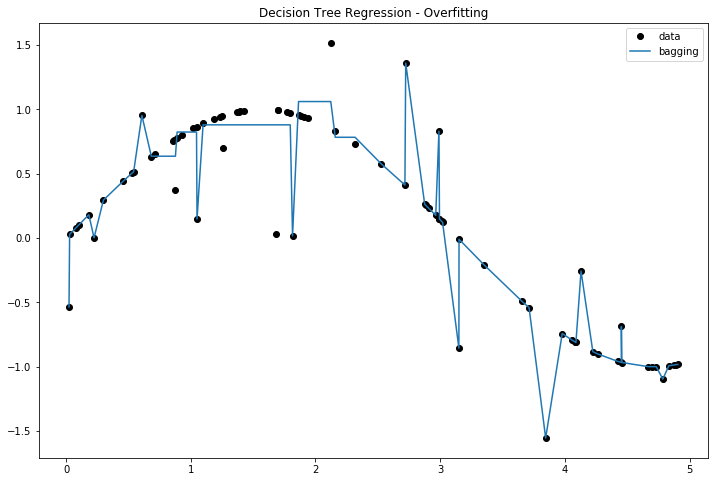

In [7]:
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - rng.rand(16))

tree = DecisionTreeRegressor(max_depth = 8)
tree.fit(X,y)
bagging = BaggingRegressor(base_estimator=tree,
                           bootstrap=False,
                           random_state=rng)
bagging.fit(X,y)
y_bagging = bagging.predict(X)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X, y_bagging, label="bagging")

#plots for Bagging/Tree
plt.title("Decision Tree Regression - Overfitting")
plt.legend(loc=1, numpoints=1)
plt.show()

** interprétation **: l'ajout du noise est modélisé par le paramètre bootstrap du baggingRegressor. On constate d'après la figure que le modèle est exactement adapté aux données 

### Question 5

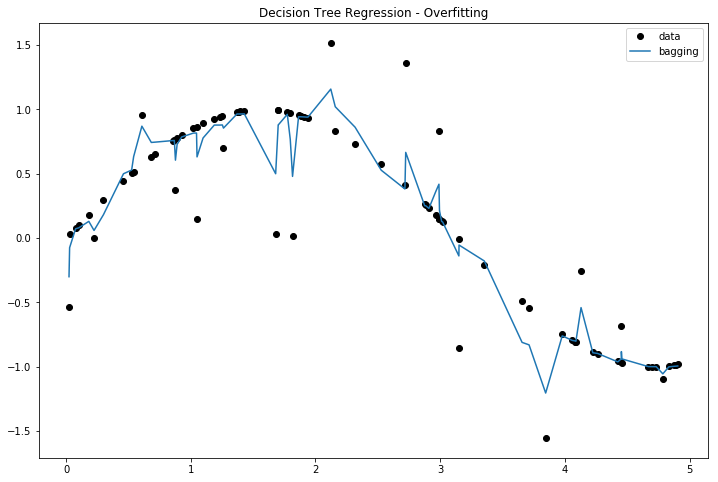

In [8]:
tree = DecisionTreeRegressor(max_depth =8)
tree.fit(X,y)
bagging = BaggingRegressor(base_estimator=tree,
                           random_state=rng)
bagging.fit(X,y)
y_bagging = bagging.predict(X)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X, y_bagging, label="bagging")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression - Overfitting")
plt.legend(loc=1, numpoints=1)
plt.show()

## Random Forests

In [9]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVR

### Question 6

#### Charger la data :

In [10]:
iris = datasets.load_iris()
diabetes = datasets.load_diabetes()
boston = datasets.load_boston()
digits = datasets.load_digits()

** Données iris:**

In [11]:
print('iris data')
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores_RF = np.absolute(cross_val_score(clf, X_test, y_test, cv=7))
print ('Score(Random Forest): ',scores_RF.mean())
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
scores_svm = np.absolute(cross_val_score(lin_clf, X_test, y_test, cv=7))
scores_svm.mean()
print ('Score(SVM): ',scores_svm.mean())


iris data
Score(Random Forest):  1.0
Score(SVM):  0.931575963719


** Données diabète :**

In [12]:
print ('diabete data')
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.4, random_state=42)
estimator = RandomForestRegressor(n_estimators=10)
estimator.fit(X_train,y_train)
score_RFR = np.absolute(cross_val_score(estimator,X_test,y_test,cv=7)).mean()
print ('score Random Forest: ',score_RFR)
svr = SVR(kernel='linear')
y_svr = svr.fit(X_train, y_train).predict(X_test)
score_SVM = np.absolute(svr.score(X_test, y_test))
print ('Score(SVR): ',score_SVM)

diabete data
score Random Forest:  0.368508644029
Score(SVR):  0.0106111842524


** Données boston :**

In [13]:
print ('boston data')
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.4, random_state=42)
estimator = RandomForestRegressor(n_estimators=10)
estimator.fit(X_train,y_train)
score_RFR = np.absolute(cross_val_score(estimator,X_test,y_test,cv=7)).mean()
print ('score(Random Forest): ',score_RFR)
svr = SVR(kernel='linear')
y_svr = svr.fit(X_train, y_train).predict(X_test)
score_SVM = np.absolute(svr.score(X_test, y_test))
print ('Score(SVR): ',score_SVM)

boston data
score(Random Forest):  0.778753904325
Score(SVR):  0.672796286153


** Données digits:**

In [14]:
print('digits data')
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores_RF = np.absolute(cross_val_score(clf, X_test, y_test, cv=7))
print ('Score(Random Forest): ',scores_RF.mean())
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
scores_svm = np.absolute(cross_val_score(lin_clf, X_test, y_test, cv=7))
scores_svm.mean()
print ('Score(SVM): ',scores_svm.mean())


digits data
Score(Random Forest):  0.920605071828
Score(SVM):  0.928542547996


### Question 7

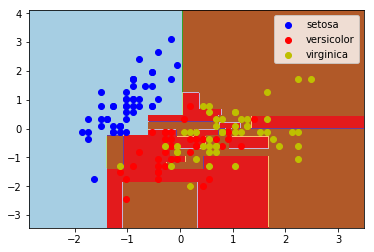

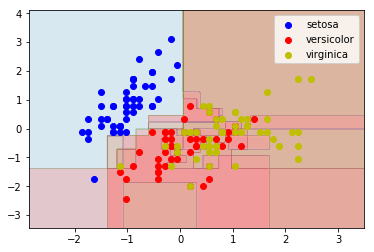

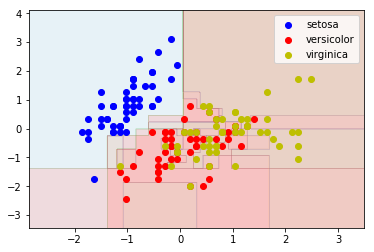

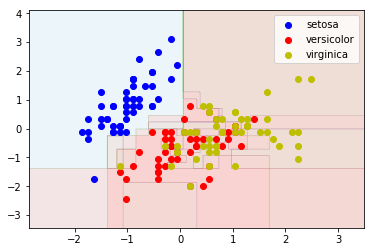

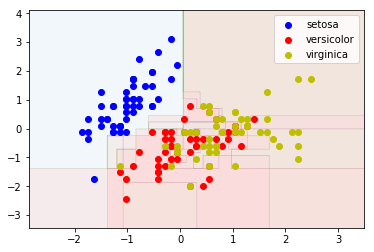

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
for n_estimators in range (1,15,3):
    plt.figure()
    for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)


    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],cmap=plt.cm.Paired)
    plt.legend(scatterpoints=1)
    plt.show()

Les image obtenues ici représente une superposition des probabilités de prédiction de chaque classe 'setosa','versicolor' et 'virginica'.

### Question 8

**a) Comparaison du score entre le RandomForest et le DecisionTreeClassifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier
X=iris.data[:,0:2]

X_train, X_test, y_train, y_test = train_test_split(
    X, iris.target, test_size=0.4, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores_RF = cross_val_score(clf, X_test, y_test, cv=6)
print ('Score(Random Forest): ',scores_RF.mean())
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores_DT = np.absolute(cross_val_score(clf, X_test, y_test, cv=6))
scores_DT.mean()
print ('Score(Decision tree): ',scores_DT.mean())


Score(Random Forest):  0.689057239057
Score(Decision tree):  0.755723905724


**b)Variation de la profondeur de l'arbre**

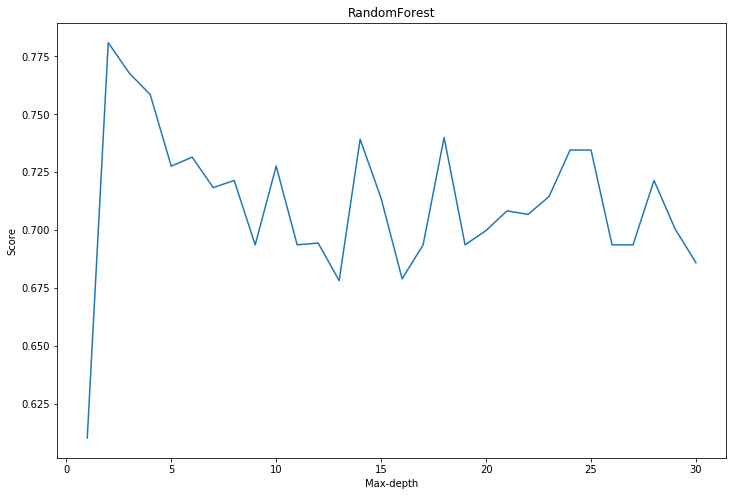

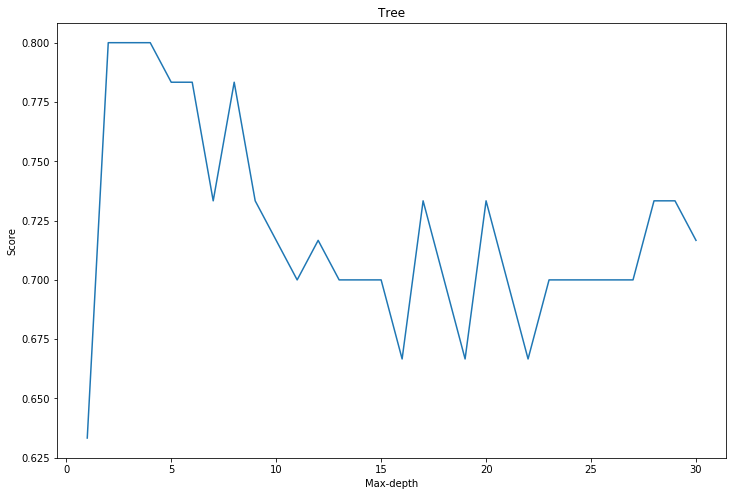

In [17]:
# Vary the parameter max_depth between 1 and 30（RANDOMFOREST）
plt.figure(figsize=(12, 8))
score = []
for i in range(1,31):
    clf = RandomForestClassifier(max_depth= i)
#     clf.fit(X_train,y_train)
    score.append(np.mean(cross_val_score(clf, X, iris.target, cv=6)))
plt.title('RandomForest')
plt.xlabel("Max-depth")
plt.ylabel("Score")
plt.plot(range(1,31),score) 
plt.show()

# Vary the parameter max_depth between 1 and 30（TREE）
plt.figure(figsize=(12, 8))
score = []
for i in range(1,31):
    tree = DecisionTreeClassifier(max_depth= i)
    tree.fit(X_train, y_train)
    score.append(tree.score(X_test,y_test))    
plt.title('Tree')    
plt.xlabel("Max-depth")
plt.ylabel("Score")
plt.plot(range(1,31),score) 
plt.show()

**Conclusion:** Nous constatons qu'en variant la profondeur de l'arbre le score pour le RandomForest et le DecisionTree diminue. Ce qui prouve qu'il y a un phénomène de overfitting.